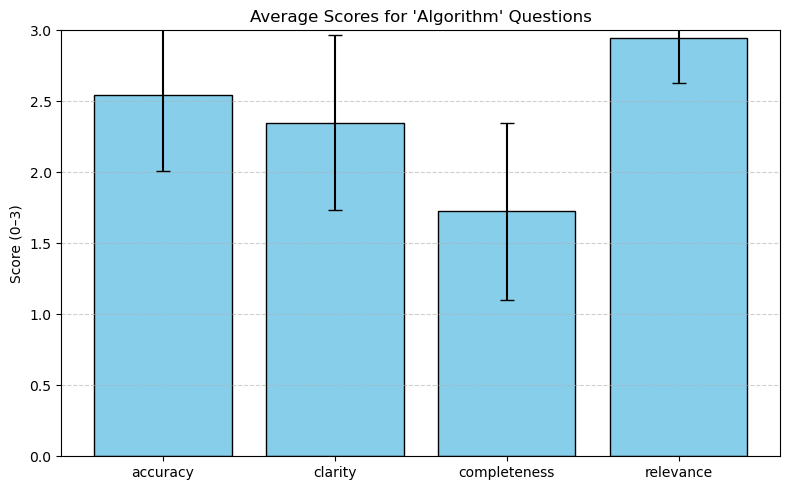

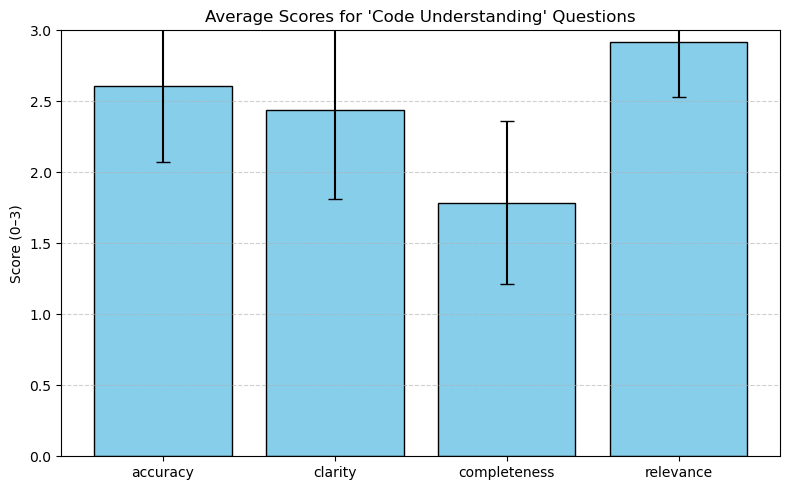

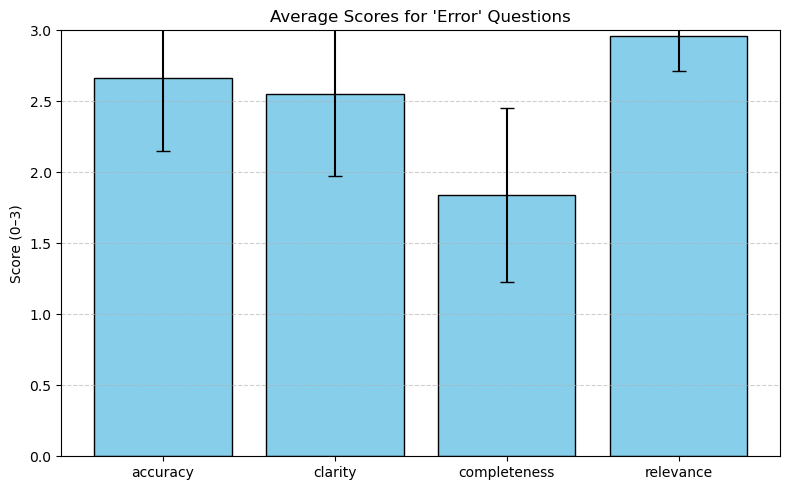

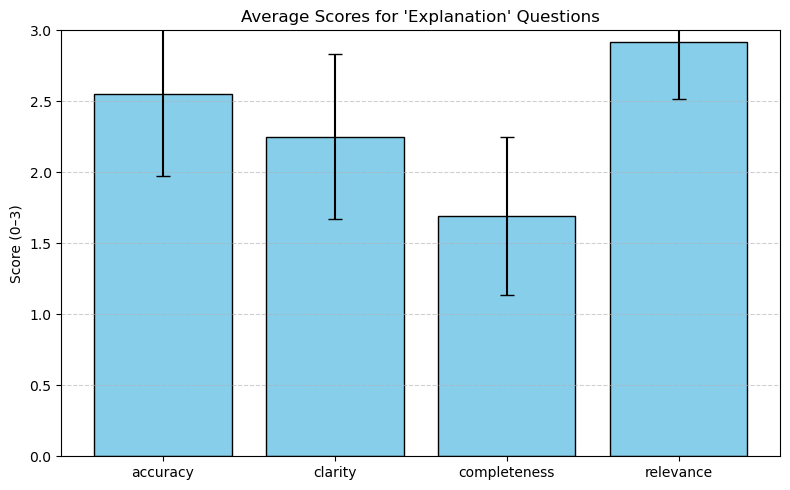

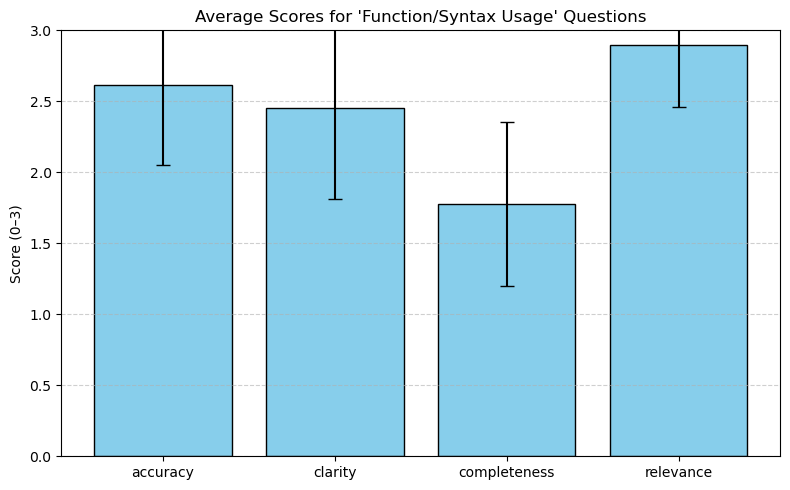

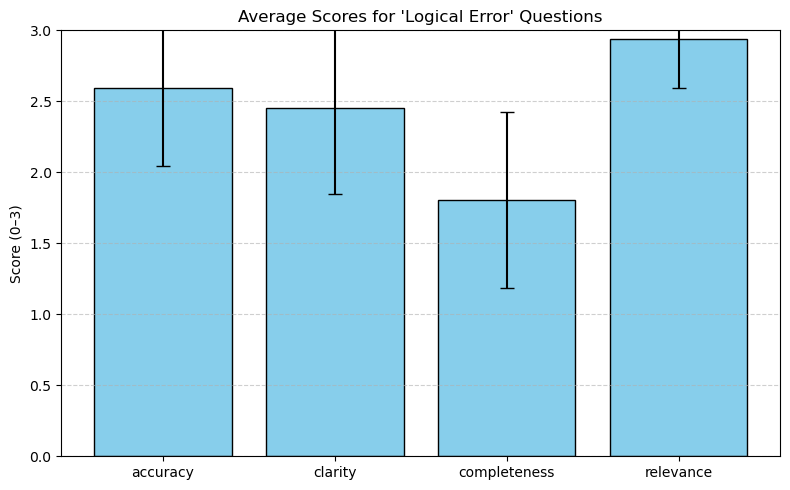

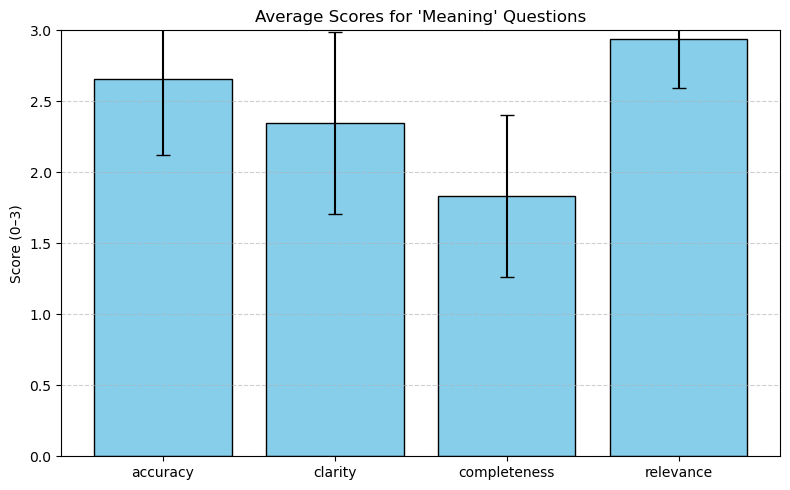

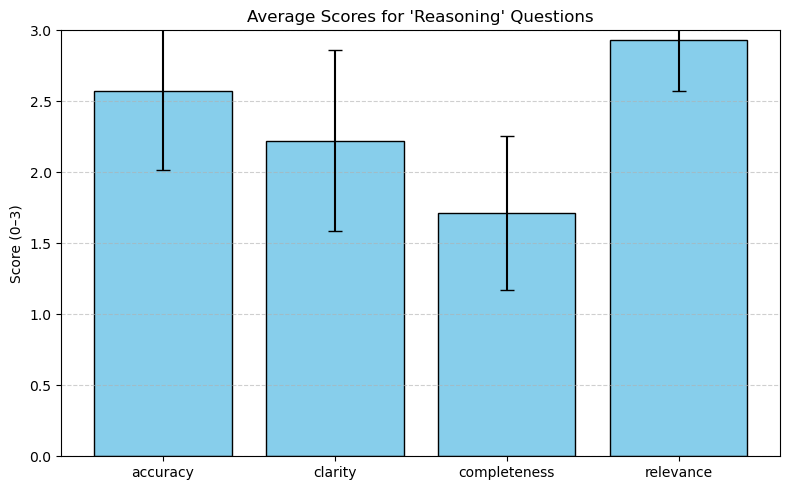

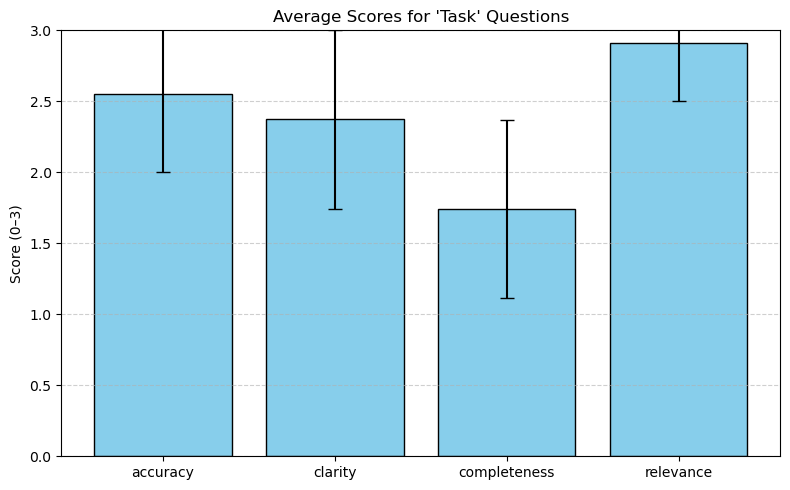

,Question Type,Accuracy,Completeness,Clarity,Relevance
0,Algorithm,2.55 (0.53),1.73 (0.62),2.35 (0.62),2.94 (0.31)
1,Code Understanding,2.61 (0.54),1.79 (0.57),2.44 (0.63),2.92 (0.39)
2,Error,2.66 (0.51),1.84 (0.61),2.55 (0.58),2.96 (0.25)
3,Explanation,2.55 (0.58),1.69 (0.56),2.25 (0.58),2.91 (0.40)
4,Function/Syntax Usage,2.61 (0.56),1.78 (0.58),2.45 (0.64),2.90 (0.44)
5,Logical Error,2.59 (0.55),1.81 (0.62),2.46 (0.61),2.94 (0.34)
6,Meaning,2.66 (0.54),1.83 (0.57),2.35 (0.64),2.94 (0.34)
7,Reasoning,2.57 (0.56),1.71 (0.54),2.22 (0.64),2.93 (0.36)
8,Task,2.55 (0.55),1.74 (0.63),2.37 (0.63),2.91 (0.41)


In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the dataset ===
with open("CS1QA_Codellama_llm_judge_scores.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# === Step 2: Classify question types ===
def classify_question_type(q):
    if q.startswith("code_understanding"):
        return "Code Understanding"
    elif q.startswith("logical"):
        return "Logical Error"
    elif q.startswith("error"):
        return "Error"
    elif q.startswith("usage"):
        return "Function/Syntax Usage"
    elif q.startswith("algorithm"):
        return "Algorithm"
    elif q.startswith("task"):
        return "Task"
    elif q.startswith("reasoning"):
        return "Reasoning"
    elif q.startswith("code_explain"):
        return "Explanation"
    elif q.startswith("variable"):
        return "Meaning"
    else:
        return "Other"

df['question_type'] = df['questionType'].apply(classify_question_type)

# === Step 3: Extract score values from nested structure ===
metrics = ["accuracy", "clarity", "completeness", "relevance"]
for metric in metrics:
    df[metric] = df[metric].apply(lambda x: x.get("score") if isinstance(x, dict) else None)

# === Step 4: Generate plots for each question type ===
def visualize_scores(flat_records, title):
    df_scores = pd.DataFrame(flat_records)
    grouped = df_scores.groupby("metric")["score"]
    avg_scores = grouped.mean()
    std_scores = grouped.std().fillna(0)

    plt.figure(figsize=(8, 5))
    plt.bar(
        avg_scores.index,
        avg_scores.values,
        yerr=std_scores.values,
        capsize=5,
        color='skyblue',
        edgecolor='black'
    )
    plt.title(title)
    plt.ylabel("Score (0–3)")
    plt.ylim(0, 3)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

for qtype, subset in df.groupby("question_type"):
    flat_records = []
    for metric in metrics:
        for score in subset[metric].dropna():
            flat_records.append({"metric": metric, "score": score})
    if flat_records:
        visualize_scores(flat_records, title=f"Average Scores for '{qtype}' Questions")

# === Step 5: Create a summary table ===
summary = []
for qtype, subset in df.groupby("question_type"):
    row = {"Question Type": qtype}
    for metric in metrics:
        mean_val = subset[metric].mean()
        std_val = subset[metric].std()
        if pd.notna(mean_val) and pd.notna(std_val):
            row[metric.capitalize()] = f"{mean_val:.2f} ({std_val:.2f})"
        elif pd.notna(mean_val):
            row[metric.capitalize()] = f"{mean_val:.2f} (0.00)"
        else:
            row[metric.capitalize()] = "N/A"
    summary.append(row)

summary_df = pd.DataFrame(summary)
summary_df = summary_df[["Question Type", "Accuracy", "Completeness", "Clarity", "Relevance"]]
summary_df = summary_df.round(2)

# === Display the table ===
from IPython.display import display
display(summary_df)
